In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Constants

G = 6.67*10**-11 #Gravitational Constant
g = 9.81 #Gravity
Me = 5.9*10**24 #Mass of Earth
Mm = 7.3*10**22 #Mass of Moon
Ma = 5500 #Mass of Apollo Command Module
Re = 6378 #Radius of Earth
Rm = 1737 #Radius of Moon
Dem = 3.8 * 10**8 #Distance from Earth to Moon
VS1 = 2.4 * 10**3 #Exhaust velocity  Saturn 1
BS1 = 1.3* 10**4 #Burn rate Saturn 1
WS1 = 2.4 * 10**3 #Wet mass Saturn 1
DS1 = 7.5 * 10**5 #Dry mass Saturn 1

In [45]:
#1.1

#Potential at a distance r from a mass M
def PotentialEPoint (M, XM, YM, X, Y):
    r = np.sqrt(((XM-X)**2)+((YM-Y)**2))
    ans = (-G*M)/r
#    if r == 0:
#        ans = np.inf
    return ans

C:\Users\MARTI\AppData\Local\Temp\ipykernel_11652\431353755.py:6: RuntimeWarning: divide by zero encountered in divide
  ans = (-G*M)/r


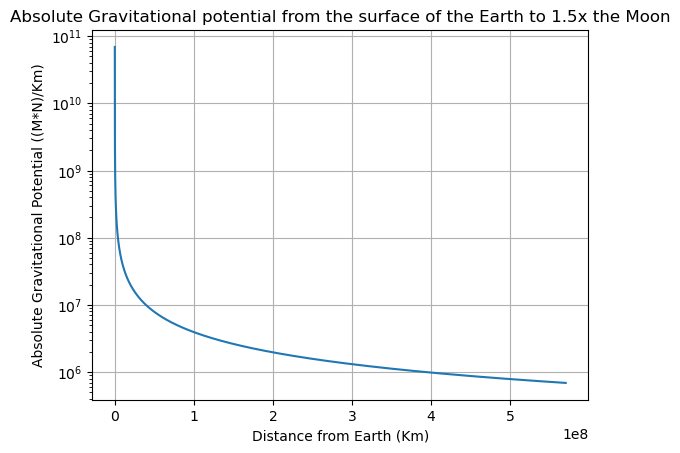

In [46]:
#1.2

#Make plot
fix, ax = plt.subplots()

#Get values
x = np.linspace(0, int(1.5*Dem), 10**5)
y = abs(PotentialEPoint(Me, 0, 0, x, 0))

#Plot plot
ax.plot(x,y)
ax.set_yscale("log")
ax.set_ylabel("Absolute Gravitational Potential ((M*N)/Km)")
ax.set_xlabel("Distance from Earth (Km)")
ax.set_title("Absolute Gravitational potential from the surface of the Earth to 1.5x the Moon")
ax.grid()